## Homework 5 - Numerical 

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
%matplotlib inline

In [23]:
# time index for the data 
time_index = np.arange(0.01, 1.01, 0.01)

In [24]:
# time incrementing per each value of t
time_increment = time_index[1:] - time_index[:-1]

Simulate 100 paths for the diffusions below on $[0,1]$ using the Euler scheme (see Chapter 7) for a discretization of $0.01$

In [25]:
# standard brownian motion covariance matrix 
bm_cov = np.reshape(np.array([i if i < j else j for j in time_index for i in time_index]), (100,100))

In [26]:
bm_cov

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.01, 0.02, 0.03, ..., 0.03, 0.03, 0.03],
       ...,
       [0.01, 0.02, 0.03, ..., 0.98, 0.98, 0.98],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 0.99],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 1.  ]])

In [32]:
np.random.seed(0)

# the standard brownian motion to be implemented 
brownian_motion = np.insert(np.array([np.linalg.cholesky(bm_cov).dot(np.random.normal(loc=0, 
                                                                                      scale=1, 
                                                                                      size=100)) for _ in range(100)]), 
                            obj=0, 
                            values=0,
                            axis=1)

In [33]:
brownian_increments = np.delete(np.roll(brownian_motion,-1) - brownian_motion, obj=100, axis=1)

In [34]:
brownian_increments

array([[ 0.17640523,  0.04001572,  0.0978738 , ...,  0.17858705,
         0.01269121,  0.04019894],
       [ 0.18831507, -0.13477591, -0.1270485 , ...,  0.08235042,
         0.21632359,  0.13365279],
       [-0.03691818, -0.02393792,  0.10996596, ...,  0.05829537,
        -0.0399449 ,  0.03700559],
       ...,
       [-0.00552438,  0.0130643 ,  0.04406911, ...,  0.09722072,
        -0.09189505,  0.06632405],
       [-0.01334914, -0.15663703, -0.17486514, ...,  0.00708476,
         0.24357285,  0.09716812],
       [-0.09329622,  0.28652035, -0.1792048 , ...,  0.05168722,
        -0.00329207,  0.12981114]])

In [30]:
a_plot = np.insert(np.cumprod(np.delete(brownian_increments, obj=99, axis=1)+1,axis=1),0,1,axis=1)

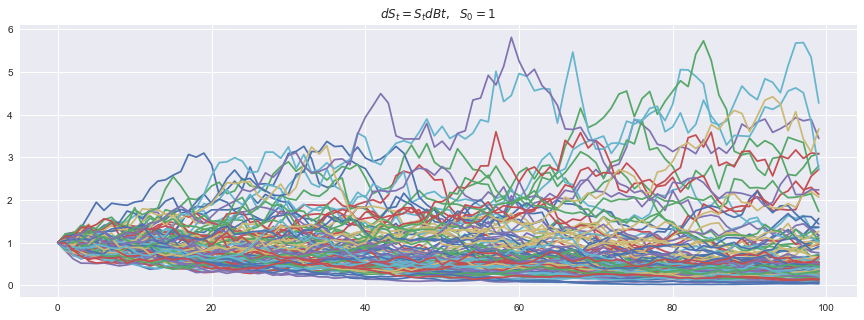

In [31]:
plt.figure(figsize=(15,5))
plt.title("$dS_t = S_tdBt, \ \ S_0 = 1$")
for i in a_plot:
    plt.plot(i)

In [93]:
# for calculating the itterative expression
def bFunc(brownian:np.array, time_index: np.array, initial:int, size:int):
    temp = initial
    new_arr = [initial]*(size+1)
    for i in range(size):
        new_arr[i+1] = temp + (-temp * time_index[i]) + brownian[i]
        temp += (-temp * time_index[i]) + brownian[i]
    return np.array(new_arr) 

In [94]:
b_plot = np.apply_along_axis(bFunc, 1, np.delete(brownian_increments, 99, 1), time_increment, 1, 99)

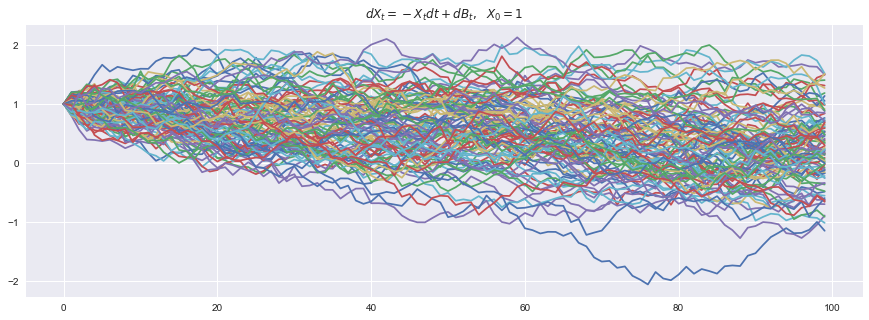

In [95]:
plt.figure(figsize=(15,5))
plt.title("$dX_t = -X_tdt + dB_t, \ \ X_0 = 1$")
for i in b_plot:
    plt.plot(i)

Discard the path if they become negative here. Out of 100, how many paths are discarded?

In [105]:
# for calculating the itterative expression
def cFunc(brownian:np.array, time_index: np.array, initial:int, size:int):
    temp = initial
    new_arr = [initial]*(size+1)
    for i in range(size):
        new_arr[i+1] = temp + (np.sqrt(temp) * brownian[i]) + (0.5 * time_index[i])
        temp += (np.sqrt(temp) * brownian[i]) + (0.5 * time_index[i])
    return np.array(new_arr) 

In [106]:
c_plot = np.apply_along_axis(cFunc, 1, np.delete(brownian_increments, 99, 1), time_increment, 5, 99)

A total of 0 were dropped out of 100


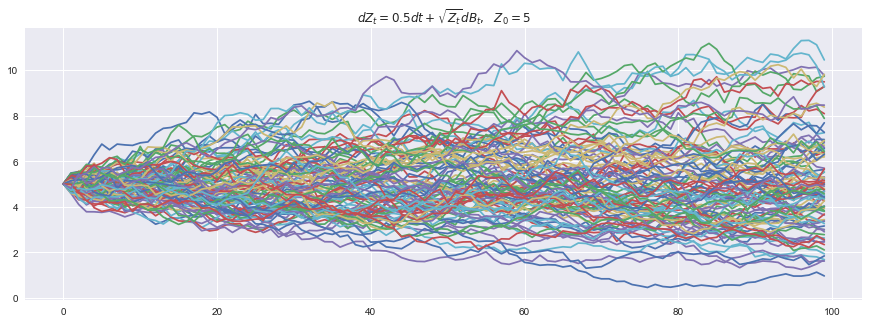

In [107]:
plt.figure(figsize=(15,5))
plt.title("$dZ_t = 0.5dt + \sqrt{Z_t}dB_t, \ \ Z_0 = 5$")
count = 0

for i in c_plot:
    if i[-1] > 0:
        plt.plot(i)
    else:
        count += 1

print("A total of {} were dropped out of 100".format(count))